# Block C: Responsible AI 

For details regarding ILO 3.1 and the use-case, please refer to the Assessment rubric in Microsoft Teams, and the [DataLab: Responsible AI](https://adsai.buas.nl/Study%20Content/Responsible%20and%20Explainable%20AI/UseCases.html) GitHub page.

## Use-case 1: Identifying, and describing bias

When I was reviewing the data, I observed examples of bias.    

Firstly, I focused on racism, and it wasn’t so hard to find out that most of the pictures with black people have the title “mining”. We can clearly see pictures of black people, sometimes also children, which are working without any tools, In horrible conditions. Thats strange that there is that much bias to black people among this date, and for sure it shouldn't look like that. 

What is more, i checked all photos with weddings and unfortunately there is another example of bias. All of wedding couples are heterosexual. There we have clear example of bias against homosexuality. 

These biases have harmful implications for fairness. The racial bias reinforces stereotypes and limits opportunities for black individuals, while the bias against homosexuality marginalizes and denies visibility to LGBTQ+ individuals. Such biases are one of the reasons for discrimination, inequality, and exclusion.

Teenagers, who are more susceptible to the negative effects of bias, may face self-esteem issues, mental health challenges, and difficulty navigating a fair and inclusive society. It is crucial to address these biases to ensure equitable and unbiased computer vision models that respect the diverse experiences and identities of individuals.

## Use-case 2: Propose individual fairness method

When analyzing the data, I identified two instances of bias in the Imsitu dataset. To mitigate these biases, I propose two approaches. Firstly, regarding the biased depiction of black people working in mines, we can employ the Fairness Through Unawareness method. This involves removing the label "mining" from pictures featuring black individuals, thus eliminating racist associations and preventing further distribution of biased content.

Secondly, in addressing the bias against homosexuality in wedding images, we can utilize the Fairness Through Awareness method. By adding photos of homosexual couples, we ensure a more balanced and inclusive representation, mitigating the bias in the dataset.

These mitigation strategies aim to reduce bias while minimizing alterations to the existing data. By applying these methods, we can promote fairness and create a more inclusive Imsitu dataset without compromising the overall integrity and accuracy of the dataset.

## Use-case 3: Create a subset of images from the original dataset

Write your text for use-case 3 here

In [3]:
#Write your Python code for use-case 3 here


import json

def get_verb_agent(json_file, verb_custom, agent_custom):
    train = json.load(open(json_file))
    verb_value = []
    agent_key = []
    agent_value = []
    file_path = []
    count = 0
    for i in train:
        verb = train[i]['verb']
        if verb == verb_custom:
            frames = train[i]['frames']
            for frame in frames:
                for key, value in frame.items():
                    if key == 'agent':
                        if value in agent_custom:
                            if i not in file_path:
                                agent_key.append(key)
                                agent_value.append(value)
                                file_path.append(i)
                                verb_value.append(verb)
                                count += 1
                        else:
                            continue
                    else:
                        continue
    return(file_path, verb_value, agent_key, agent_value, count)

get_verb_agent('train.json','crawling', ['n06579715', "n04275283", "n01772222" ])



(['crawling_172.jpg', 'crawling_118.jpg', 'crawling_128.jpg'],
 ['crawling', 'crawling', 'crawling'],
 ['agent', 'agent', 'agent'],
 ['n01772222', 'n01772222', 'n01772222'],
 3)

In [4]:
import json

# load imsitu_space.json file
imsitu_space = json.load(open("imsitu_space.json"))

nouns = imsitu_space["nouns"]
verbs = imsitu_space["verbs"]

# function to get all agent codes for a specific agent/noun
def get_agent_codes(agent = "gymnasium"):
    for noun in nouns:
        if nouns[noun]['gloss'][0] == agent:
            print(f"{agent} found")
            print(noun)

# get all agent codes for men (use your own nouns here)
get_agent_codes("spider")

spider found
n06579715
spider found
n04275283
spider found
n01772222


In [5]:
import shutil

def img_to_folder(dirs_original, dirs_destination):
    image_list = get_verb_agent('train.json','crawling', ['n06579715', "n04275283", "n01772222" ])[0]
    dirs_list = [(dirs_original, dirs_destination)]
    for img in image_list:
        for source_folder, destination_folder in dirs_list:
            shutil.copy(source_folder+img, destination_folder+img)

img_to_folder(r"C:\Users\domin\Desktop\of500_images_resized\of500_images_resized/", r"C:/Users/domin/Desktop/Block C/train/")

In [6]:
import pandas as pd

def lists_to_df(dirs_destination, col1_name, col2_name, col3_name):
    col1 = get_verb_agent('train.json','sucking', ['n00570854', "n02274259" ])[0]
    col2 = get_verb_agent('train.json','sucking', ['n00570854', "n02274259" ])[1]
    col3 = get_verb_agent('train.json', 'sucking', ['n00570854', "n02274259" ])[3]
    df = pd.DataFrame(list(zip(col1, col2, col3)), columns=[col1_name, col2_name, col3_name])
    df.to_csv(dirs_destination, index=False)
    return df

lists_to_df('C:/Users/domin/Desktop/Block C/train/pressing_train.csv', 'file_name','verb', 'agent')

,file_name,verb,agent
0,sucking_72.jpg,sucking,n02274259
1,sucking_52.jpg,sucking,n02274259
2,sucking_252.jpg,sucking,n02274259


In [7]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/Users/domin/Desktop/Block C/train/pressing_train.csv')

# train, test = train_test_split(df, test_size = 0.2)
# test, valid = train_test_split(test, test_size = 0.5)


## Use-case 4: Write Python functions; group fairness metrics

Write your text for use-case 4 here

In [8]:
import numpy as np

def load_confusion_matrices():
    cm_priv = np.load('C:/Users/domin/Desktop\Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Responsible_AI/confusion_matrix_priv_female.npy')
    tn_priv = cm_priv[0][0]
    fp_priv = cm_priv[0][1]
    fn_priv = cm_priv[1][0]
    tp_priv = cm_priv[1][1]
    cm_unpriv = np.load('C:/Users/domin/Desktop\Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Responsible_AI/confusion_matrix_unpriv_male.npy')
    tn_unpriv = cm_unpriv[0][0]
    fp_unpriv = cm_unpriv[0][1]
    fn_unpriv = cm_unpriv[1][0]
    tp_unpriv = cm_unpriv[1][1]
    return [[tn_priv, fp_priv, fn_priv, tp_priv], [tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv]]

load_confusion_matrices()



def demographic_parity():
    [[tn,fp,fn,tp],[tnm,fpm,fnm,tpm]]=load_confusion_matrices()
    NR = (tp + fp)/(tn + fp + fn + tp)
    NRm = (tpm + fpm)/(tnm + fpm + fnm + tpm)

    return NR, NRm, NR-NRm

demographic_parity()

def predictive_parity():
    [[tn,fp,fn,tp],[tnm,fpm,fnm,tpm]]=load_confusion_matrices()
    PPV = tp/(tp+fp)
    PPVm = tpm/(tpm+fpm)
    return PPVm, PPV, PPVm - PPV

predictive_parity()

def equalized_odds():
    [[tn,fp,fn,tp],[tnm,fpm,fnm,tpm]]=load_confusion_matrices()
    EO = (tp )/(tp + fn )
    EOm = (tpm)/(tpm + fnm )
    EOf = (tn )/(tn + fp )
    EOmf = (tnm)/(tnm + fpm )
    return EO - EOm, EOmf-EOf

equalized_odds()

def conditional_use_accuracy_equality():
    [[tn,fp,fn,tp],[tnm,fpm,fnm,tpm]]=load_confusion_matrices()
    CAE_PPV = - (tp )/(tp + fp ) + (tpm )/(tpm + fpm ) 
    CAE_NPV = - (tn)/(tn + fn) + (tnm)/(tnm + fnm) 
    return CAE_PPV, CAE_NPV

conditional_use_accuracy_equality()

def equal_selection_parity():
    [[tn,fp,fn,tp],[tnm,fpm,fnm,tpm]]=load_confusion_matrices()
    SP = tp +fp
    SPm = tpm + fpm

    return SPm,SP, SP - SPm

equal_selection_parity()

def equal_opportunity():
    [[tn,fp,fn,tp],[tnm,fpm,fnm,tpm]]=load_confusion_matrices()
    EOm = tp/(fn+tp)
    EO = tpm/(fnm+tpm)
    return EO, EOm, EOm - EO

equal_opportunity()

def predictive_equality():
    [[tn,fp,fn,tp],[tnm,fpm,fnm,tpm]]=load_confusion_matrices()
    PE = tn/(fp+tn)
    PEm = tnm/(fpm+tnm)
    return PEm, PE, PEm -PE

predictive_equality()

number = equal_opportunity()
number


(0.7142857142857143, 0.7551020408163265, 0.04081632653061218)

## Use-case 6: Apply one/multiple explainable AI method(s) to the image classifier

Write your text for use-case 6 here

## My model:

In [10]:
from glob import glob
import cv2
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [11]:
# Creating list of X and y
X_train = []
y_train = []

# Iterate the folder with glob
for fpath in glob('C:/Users/domin/Desktop/Block C/train/*.jpg'):
    # Opening images with OpenCV
    # Alternatives: PIL, Matplotlib
    im = cv2.imread(fpath, 1)
    
    # If the filename contains frying
    # label = 1
    # otherwise it must be microwaving so label = 0
    if 'spider' in fpath:
        label = 1
    else:
        label = 0
    im = cv2.resize(im,(256,256))
    # Put image array to X
    # Put label to y
    X_train.append(im)
    y_train.append(label)
        

# Convert the list of arrays
# Into a numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)


X_train, X_test , y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)
X_test, X_val , y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [12]:
def build_model(print_summary=False):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(256,256, 3),padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu') )
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    if print_summary:
        model.summary()
    return model
model = build_model(print_summary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

In [13]:
def compile_model(model, lr):
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics='accuracy')
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss = 'binary_crossentropy',metrics='accuracy')
    return model

In [14]:
model = build_model()
model = compile_model(model, lr = 1e-6)

In [15]:
callback = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
H = model.fit(X_train, y_train, epochs = 50, validation_data=(X_val, y_val),batch_size=16,callbacks= callback)

Epoch 1/50
20/20 [==============================] - 6s 259ms/step - loss: 0.8490 - accuracy: 0.4620 - val_loss: 0.8911 - val_accuracy: 0.5250
Epoch 2/50
20/20 [==============================] - 5s 250ms/step - loss: 0.7472 - accuracy: 0.5285 - val_loss: 0.7146 - val_accuracy: 0.5500
Epoch 3/50
20/20 [==============================] - 5s 241ms/step - loss: 0.6954 - accuracy: 0.6076 - val_loss: 0.6590 - val_accuracy: 0.6000
Epoch 4/50
20/20 [==============================] - 5s 262ms/step - loss: 0.6415 - accuracy: 0.6329 - val_loss: 0.6238 - val_accuracy: 0.6500
Epoch 5/50
20/20 [==============================] - 5s 254ms/step - loss: 0.5771 - accuracy: 0.7089 - val_loss: 0.6092 - val_accuracy: 0.7000
Epoch 6/50
20/20 [==============================] - 6s 277ms/step - loss: 0.5515 - accuracy: 0.6962 - val_loss: 0.5852 - val_accuracy: 0.7500
Epoch 7/50
20/20 [==============================] - 5s 236ms/step - loss: 0.5087 - accuracy: 0.7342 - val_loss: 0.5475 - val_accuracy: 0.7750
Epoch 

## Explainable AI methods:


### GrandCAM:

In [17]:
import numpy as np
import tensorflow as tf
import PIL

#load GradCAM
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tf_explain.core.gradients_inputs import GradientsInputs
from tf_explain.core.integrated_gradients import IntegratedGradients

In [18]:
IMAGE_PATH1 = "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/butterfly.jpg" 

In [19]:
img = tf.keras.preprocessing.image.load_img(IMAGE_PATH1, target_size=(256, 256))
img = tf.keras.preprocessing.image.img_to_array(img)

In [20]:
#first create the input in a format that the explainer expects (a tuple)
input_img = (np.array([img]), None)

#initialize the explainer as an instance of the GradCAM object
explainer = GradCAM()

# Obtain explanations for your image using VGG 16 and GradCAM
grid = explainer.explain(input_img,
                         model,
                         class_index=0
                         )

#save the resulting image
explainer.save(grid, "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/", "grad_cam_butterfly.jpg")

## IntegratedGradients


In [21]:
#first create the input in a format that the explainer expects (a tuple)
input_img = (np.array([img]), None)

#initialize the explainer as an instance of the GradCAM object
explainer =  IntegratedGradients()

# Obtain explanations for your image using VGG 16 and GradCAM
grid = explainer.explain(input_img,
                         model,
                         
                         class_index=0
                         )

#save the resulting image
explainer.save(grid, "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/", "GradientsInputs_butterfly.jpg")

## OcclusionSensitivity

In [22]:
#first create the input in a format that the explainer expects (a tuple)
input_img = (np.array([img]), None)

#initialize the explainer as an instance of the GradCAM object
explainer = OcclusionSensitivity()

# Obtain explanations for your image using VGG 16 and GradCAM
grid = explainer.explain(input_img,
                         model,
                         patch_size=4,
                         class_index=0
                         )

#save the resulting image
explainer.save(grid, "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/", "Occlusion_Sensitivity_butterfly.jpg")

128/128 [==============================] - 16s 125ms/step


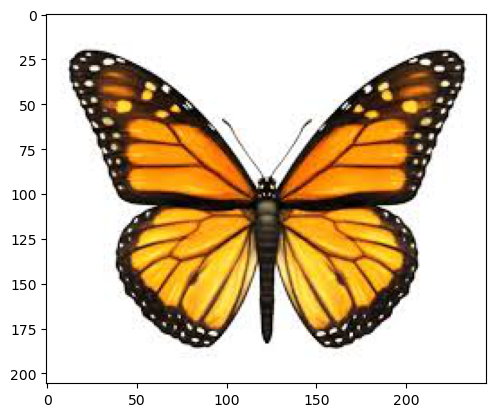

In [23]:
Butterfly = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/butterfly.jpg')
plt.imshow(Butterfly)
plt.show()

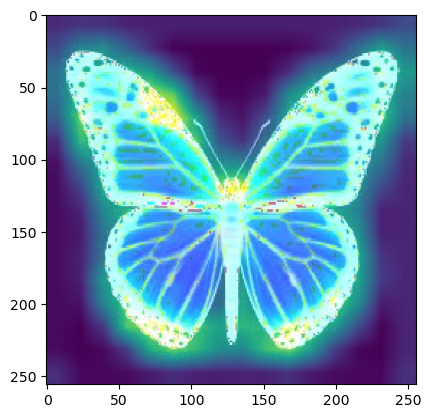

In [24]:
Butterfly1 = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/grad_cam_butterfly.jpg')
plt.imshow(Butterfly1)
plt.show()

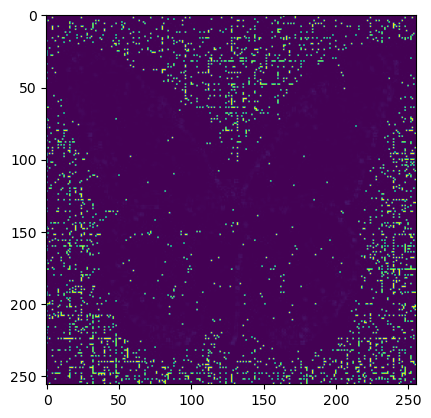

In [25]:
Butterfly = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/GradientsInputs_butterfly.jpg')
plt.imshow(Butterfly)
plt.show()

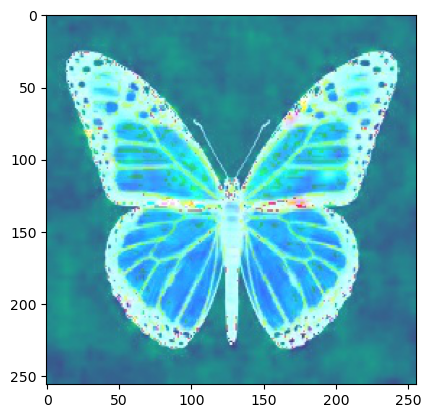

In [26]:
Butterfly = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/Occlusion_Sensitivity_butterfly.jpg')
plt.imshow(Butterfly)
plt.show()

In [27]:
IMAGE_PATH2 = "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/spider_1.jpg" 

In [28]:
img = tf.keras.preprocessing.image.load_img(IMAGE_PATH2, target_size=(256, 256))
img = tf.keras.preprocessing.image.img_to_array(img)

In [29]:
#first create the input in a format that the explainer expects (a tuple)
input_img = (np.array([img]), None)

#initialize the explainer as an instance of the GradCAM object
explainer = GradCAM()

# Obtain explanations for your image using VGG 16 and GradCAM
grid = explainer.explain(input_img,
                         model,
                         class_index=0
                         )

#save the resulting image
explainer.save(grid, "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/", "grad_cam_spider_1.jpg")

In [30]:
#first create the input in a format that the explainer expects (a tuple)
input_img = (np.array([img]), None)

#initialize the explainer as an instance of the GradCAM object
explainer =  IntegratedGradients()

# Obtain explanations for your image using VGG 16 and GradCAM
grid = explainer.explain(input_img,
                         model,
                         
                         class_index=0
                         )

#save the resulting image
explainer.save(grid, "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/", "GradientsInputs_spider_1.jpg")

In [31]:
#first create the input in a format that the explainer expects (a tuple)
input_img = (np.array([img]), None)

#initialize the explainer as an instance of the GradCAM object
explainer = OcclusionSensitivity()

# Obtain explanations for your image using VGG 16 and GradCAM
grid = explainer.explain(input_img,
                         model,
                         patch_size=4,
                         class_index=0
                         )

#save the resulting image
explainer.save(grid, "C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/", "Occlusion_Sensitivity_spider_1.jpg")

128/128 [==============================] - 17s 129ms/step


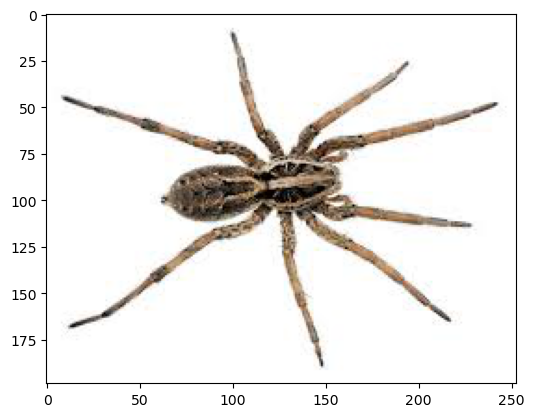

In [32]:
spider = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/spider_1.jpg')
plt.imshow(spider)
plt.show()

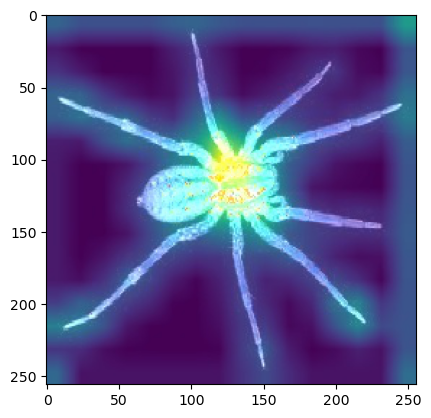

In [33]:
spider1 = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/grad_cam_spider_1.jpg')
plt.imshow(spider1)
plt.show()

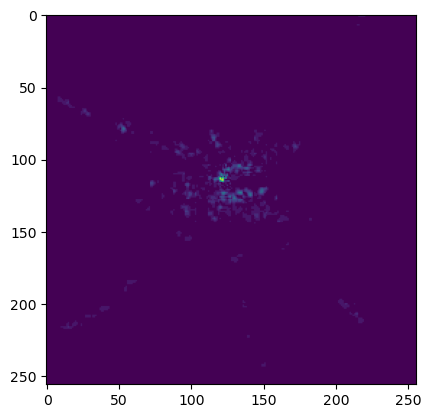

In [34]:
spider = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/GradientsInputs_spider_1.jpg')
plt.imshow(spider)
plt.show()

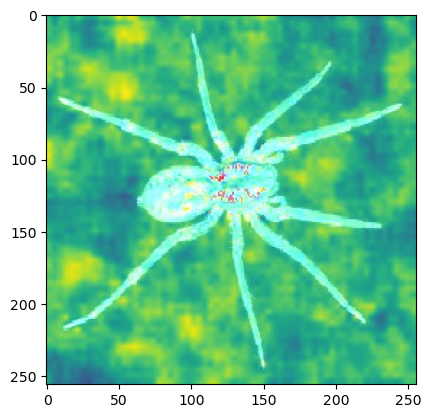

In [35]:
spider = plt.imread('C:/Users/domin/Desktop/Block C/2022-23c-1fcmgt-reg-ai-01-DominikSzewczyk224180/Self-study/Occlusion_Sensitivity_spider_1.jpg')
plt.imshow(spider)
plt.show()